In [1]:
import pandas as pd
import numpy as np
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
%matplotlib inline 
sns.set(color_codes=True)
from scipy import stats

In [2]:
df = pd.read_csv('data.csv') #data downloaded from - https://www.kaggle.com/CooperUnion/cardataset
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [3]:
df.dtypes

Make                  object
Model                 object
Year                   int64
Engine Fuel Type      object
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         object
Number of Doors      float64
Market Category       object
Vehicle Size          object
Vehicle Style         object
highway MPG            int64
city mpg               int64
Popularity             int64
MSRP                   int64
dtype: object

In [4]:
cols_to_drop = ["Engine Fuel Type", "Market Category", "Vehicle Style", "Popularity", "Number of Doors", "Vehicle Size"]
df.drop(cols_to_drop,axis=1,inplace=True)# keeping what i need
df.head()

,Make,Model,Year,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,highway MPG,city mpg,MSRP
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500


In [5]:
#for ease
rename_cols = {"Engine HP": "HP", "Engine Cylinders": "Cylinders", "Transmission Type": "Transmission", 
               "Driven_Wheels": "Drive Mode","highway MPG": "MPG_H", "city mpg": "MPG-C", "MSRP": "Price" }
df.rename(columns=rename_cols,inplace=True)
df.head()

,Make,Model,Year,HP,Cylinders,Transmission,Drive Mode,MPG_H,MPG-C,Price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500


In [6]:
print(df.count())
df.drop_duplicates(inplace=True)
df.head()

Make            11914
Model           11914
Year            11914
HP              11845
Cylinders       11884
Transmission    11914
Drive Mode      11914
MPG_H           11914
MPG-C           11914
Price           11914
dtype: int64


,Make,Model,Year,HP,Cylinders,Transmission,Drive Mode,MPG_H,MPG-C,Price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500


In [7]:
print(df.count())# around 1000 dropped

Make            10925
Model           10925
Year            10925
HP              10856
Cylinders       10895
Transmission    10925
Drive Mode      10925
MPG_H           10925
MPG-C           10925
Price           10925
dtype: int64


In [8]:
df.isnull().sum()

Make             0
Model            0
Year             0
HP              69
Cylinders       30
Transmission     0
Drive Mode       0
MPG_H            0
MPG-C            0
Price            0
dtype: int64

In [9]:
df.dropna(inplace=True)
df.isnull().sum()

Make            0
Model           0
Year            0
HP              0
Cylinders       0
Transmission    0
Drive Mode      0
MPG_H           0
MPG-C           0
Price           0
dtype: int64

In [10]:
df['Price']=np.array(df['Price']).astype(np.float)
df.describe()# gives an idea about the type of data

C:\Users\PRATIK RAJ\AppData\Local\Temp\ipykernel_17236\873846977.py:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df['Price']=np.array(df['Price']).astype(np.float)


,Year,HP,Cylinders,MPG_H,MPG-C,Price
count,10827.000000,10827.000000,10827.000000,10827.000000,10827.000000,1.082700e+04
mean,2010.896370,254.553062,5.691604,26.308119,19.327607,4.249325e+04
std,7.029534,109.841537,1.768551,7.504652,6.643567,6.229451e+04
min,1990.000000,55.000000,0.000000,12.000000,7.000000,2.000000e+03
25%,2007.000000,173.000000,4.000000,22.000000,16.000000,2.197250e+04
50%,2015.000000,240.000000,6.000000,25.000000,18.000000,3.084500e+04
75%,2016.000000,303.000000,6.000000,30.000000,22.000000,4.330000e+04
max,2017.000000,1001.000000,16.000000,354.000000,137.000000,2.065902e+06


### Plots

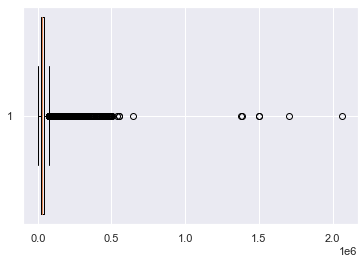

In [11]:
plt.boxplot(df.Price,vert = 0,widths=10)
plt.show()  # Boxplot for Price

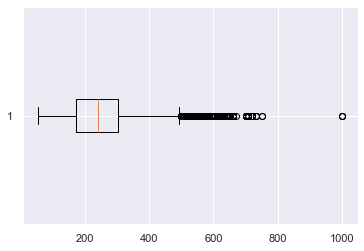

In [12]:
plt.boxplot('HP',data=df,vert=0)
plt.show() # for HP

In [13]:
a=df.columns[df.dtypes != object]
print(a)

Index(['Year', 'HP', 'Cylinders', 'MPG_H', 'MPG-C', 'Price'], dtype='object')


In [14]:
li=list(a)
li

['Year', 'HP', 'Cylinders', 'MPG_H', 'MPG-C', 'Price']

In [15]:
# removing outlier using IQR
df2=df.copy()
for x in li :
    q1 = df[x].quantile(0.25)
    q3 = df[x].quantile(0.75)
    iqr = q3-q1
    lower_limit =(q1-1.5*iqr)
    upper_limit = (q3 + 1.5*iqr)
    df2= df2[(df2[x]>=lower_limit) & (df2[x]<= upper_limit)]
    

df2.head()

,Make,Model,Year,HP,Cylinders,Transmission,Drive Mode,MPG_H,MPG-C,Price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135.0
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650.0
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350.0
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450.0
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500.0


In [16]:
print(df.shape)
print(df2.shape)
# should give a count of ouliers removed
df.shape[0]-df2.shape[0]

(10827, 10)
(9191, 10)


1636

In [17]:
df2.value_counts()

Make           Model                Year  HP     Cylinders  Transmission  Drive Mode         MPG_H  MPG-C  Price  
Acura          CL                   2001  225.0  6.0        AUTOMATIC     front wheel drive  27     17     27980.0    1
Mercedes-Benz  GLE-Class            2016  329.0  6.0        AUTOMATIC     all wheel drive    22     18     64600.0    1
               GLC-Class            2016  241.0  4.0        AUTOMATIC     rear wheel drive   28     22     38950.0    1
                                    2017  241.0  4.0        AUTOMATIC     all wheel drive    28     21     41150.0    1
                                                                          rear wheel drive   28     22     39150.0    1
                                                                                                                     ..
Ford           Explorer Sport Trac  2010  210.0  6.0        AUTOMATIC     all wheel drive    19     13     35590.0    1
                                    2009  292

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='HP', ylabel='Density'>

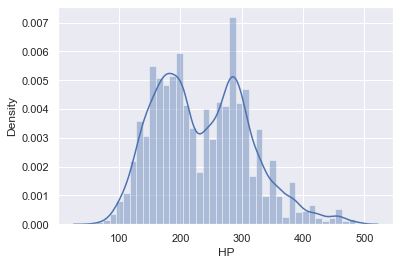

In [18]:
sns.distplot(df2['HP'])# distribution plot

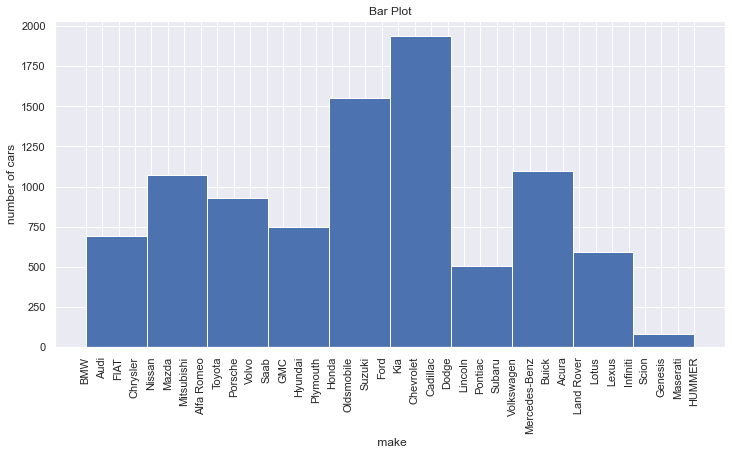

In [19]:
plt.figure(figsize=(12,6))
plt.hist(x=df2['Make'])
plt.xlabel(" make")
plt.ylabel("number of cars")
plt.xticks(rotation=90)
plt.title("Bar Plot")
plt.show()

<AxesSubplot:xlabel='HP', ylabel='Price'>

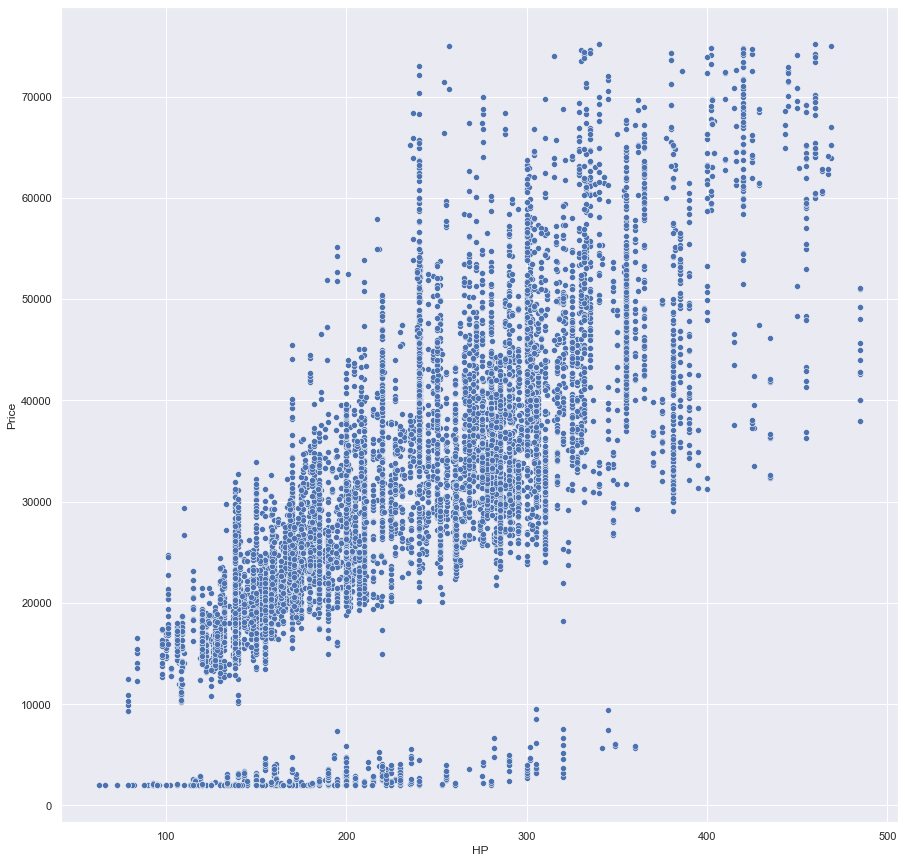

In [20]:
plt.figure(figsize=(15,15))
sns.scatterplot(x='HP',y='Price',data=df2)
#Scatter plot

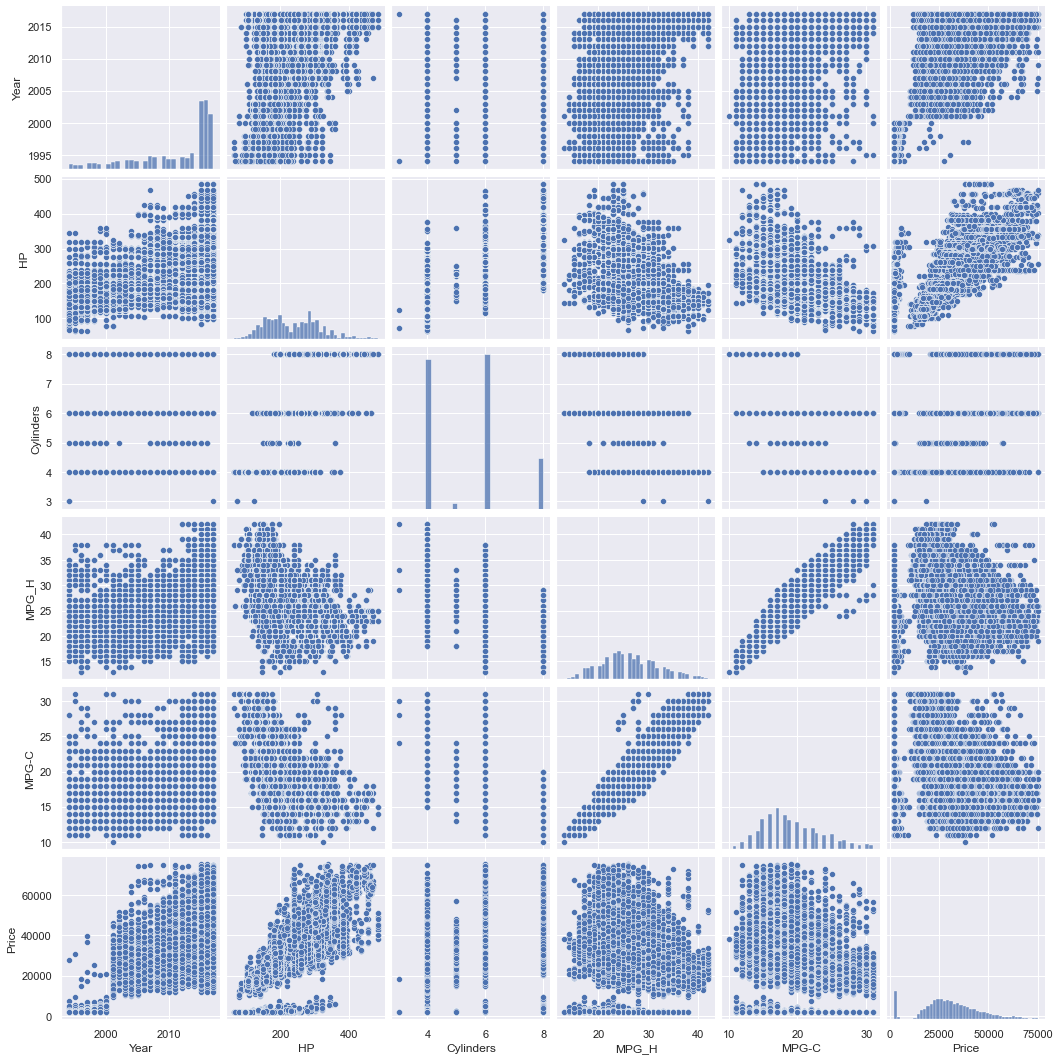

In [21]:
sns.pairplot(df2)#pair plot

<Figure size 1080x360 with 0 Axes>

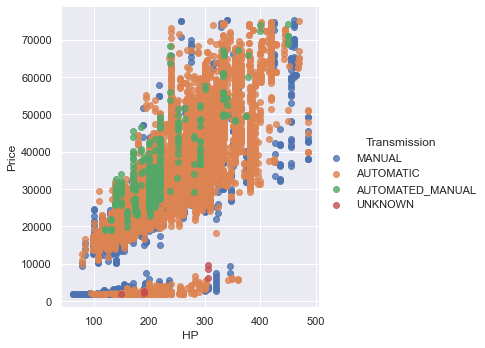

In [22]:
plt.figure(figsize=(15,5))
sns.lmplot(x='HP',y='Price',data=df2,hue='Transmission',fit_reg=False)